# Summary of Quantum Operations 

### How different Quantum Computing is from Classical Computing ??
#### Classical computers operate on two states 0 and 1 while quantum computers operate superposition states besides two 1 and 0 states called qubits.
#### Superpostions states mean that the system can be in two different states at the same time. This is impossible in classical scheme. A Qubit can be 0 and 1 both at the same time. [ Shrodinger's cat ]
#### Measurement: The quantum regime is with many different possible states. When the measurement is done with an operator, the system collapes to the state what the measurement is done to, that is, one of the states 0 or 1. We get the probability of the system being in that state.
#### Classical bits are special cases of quantum bits: The QC can perform all the jobs of CQ;  QC takes more information.
#### Reversiblity of the states: In Quantum system, the states are reversible. Higher states are the tensor product of the single qubit states and they can be factorized into qubit states again.
#### Entanglement: There are some states, which do not have individual meaning but make sense only when they are together. These irreversible states are said to be entangled and the qubits are entangled qubits. 

In this section we will go into the different operations that are available in Qiskit Terra. These are:
- Single-qubit quantum gates
- Multi-qubit quantum gates
- Entangle states
- Phase Kickback

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## 1. Single Qubit Quantum states <a name="single_states"/>

### 1.3 Representation:

#### Linear equation:

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. $\left|0\right\rangle$ and $\left|1\right\rangle$ are basis vectors.
$$
\left|0\right\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix}.
$$
$$
\left|1\right\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix}.
$$

In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. 

#### Vector form:

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note, due to the conservation of probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable ( $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$) we only require two real numbers to describe a single qubit quantum state.

#### A convenient representation:

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.

From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). 
This is called the Bloch sphere representation of a qubit state.

### 1.4 Qunatum Gates:
#### Quantum operation are carried out with Quantum Gates. 
#### A gate is represented by a Unitary matrix. 
#### A gate acting on a single qubit is a $2\times 2$ unitary matrix $U$. 

#### Action of the quantum gate: Multiplication of the column vector with the unitary matrix.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

#### Designing a gate :: developing a unitary matrix with proper elements.
A general unitary matrix: 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. 

This gives 3 constraints and as such 

$a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and 

$b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.


##### Gates are constructed by choosing the proper parameters of $\theta$, $\phi$ and $\lambda$ for the unitary matrix !!!
##### The half angle $\theta$/2 ensures representation of the complete sphere.
##### The angle $\lambda$ introduces the effect of the global phase $\delta$ on the qubit states.

## Single-Qubit Gates <a name="single_gates"/>

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

In [5]:
q = QuantumRegister(1)           ## Unitary simulator with single qubit. 

### u gates:
#### The general unitary is recalled as the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


In [6]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw()

┌────────────────────┐
q0_0: ┤ U3(pi/2,pi/2,pi/2) ├
      └────────────────────┘

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

#### The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ gate has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions.

In [8]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
qc.draw()

┌───────────────┐
q0_0: ┤ U2(pi/2,pi/2) ├
      └───────────────┘

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

#### The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

In [10]:
qc = QuantumCircuit(q)
qc.u1(pi/2,q)
qc.draw()

┌──────────┐
q0_0: ┤ U1(pi/2) ├
      └──────────┘

In [11]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

### Identity gate

The identity gate is $Id = u0(1)$.

In [12]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q0_0: ┤ I ├
      └───┘

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

###### Action of x gate:
$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


In [14]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j],
       [1.+0.j, 0.+0.j]])

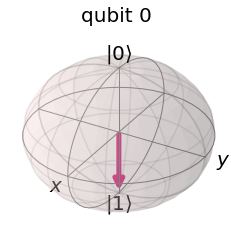

In [16]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')     # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)                                  # Assemble circuit into a Qobj that can be run
state = svsim.run(qobj).result().get_statevector()   # Do the simulation, returning the state vector
plot_bloch_multivector(state)                        # Display the output state vector in Blochsphere

##### Rotation of state about x axis by π
##### Eauivalent to Not gate classically 

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

In [114]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw()

┌───┐
q_0: ┤ Y ├
     └───┘

In [115]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

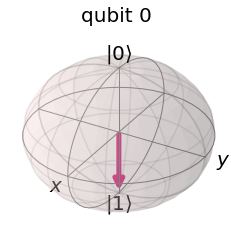

In [116]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

##### Rotation of state about y axis by π

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

In [117]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw()

┌───┐
q_0: ┤ Z ├
     └───┘

In [118]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

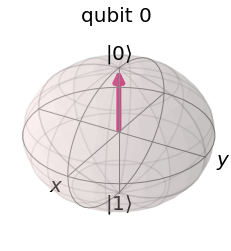

In [119]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

##### Rotation of state about z axis by π

### Clifford gates

#### Hadamard gate
##### Creates a superposition of  |0⟩  and  |1⟩
$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

###### Action of H-gate
$$ H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)= |+\rangle $$

$$ H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)= |-\rangle $$

In [77]:
qc = QuantumCircuit(1)
qc.h(0)                           # Apply H-gate to qubit 0
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

In [79]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

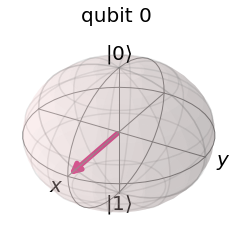

In [80]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

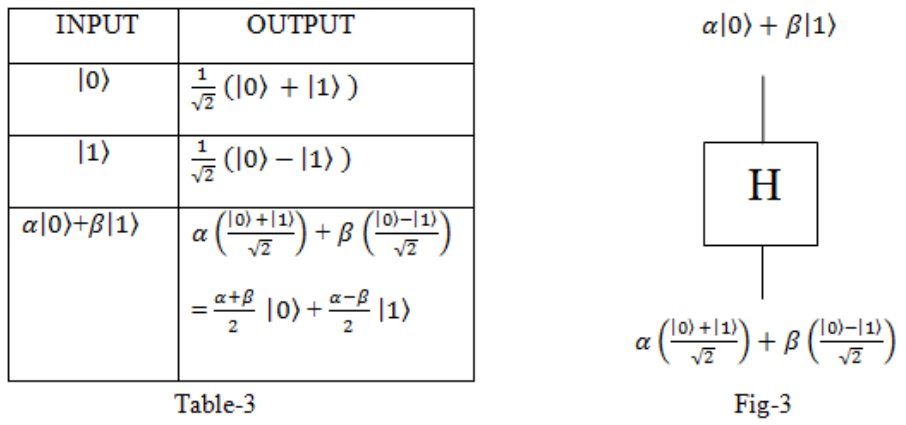

In [26]:
from IPython.display import Image
Image("c:\\Users\\nagen\\Desktop\\H-gate.png")

#### $S$ (or, $\sqrt{Z}$ phase) gate

##### Shifting phase by 𝜋/2

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

In [95]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)                              # Apply S-gate to qubit 0
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ S ├
     └───┘└───┘

In [96]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   ,  0.707-0.j   ],
       [ 0.   +0.707j, -0.   -0.707j]])

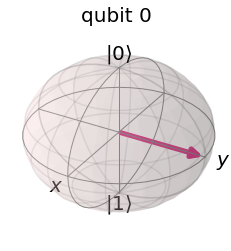

In [97]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


In [88]:
qc = QuantumCircuit(1)
qc.sdg(0)                              # Apply Sdg-gate to qubit 0
qc.draw()

┌─────┐
q_0: ┤ SDG ├
     └─────┘

In [89]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

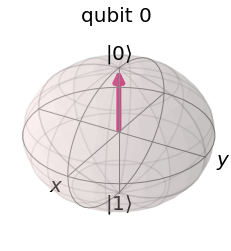

In [90]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

In [98]:
qc = QuantumCircuit(1)
qc.t(0)                    # Apply T-gate to qubit 0            
qc.draw()

┌───┐
q_0: ┤ T ├
     └───┘

In [99]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

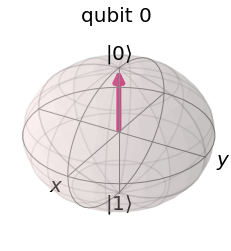

In [100]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-\pi/4)
$$

In [36]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw()

┌─────┐
q0_0: ┤ TDG ├
      └─────┘

In [37]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

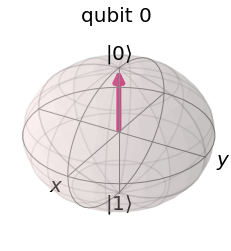

In [38]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

In [107]:
qc = QuantumCircuit(1)
qc.rx(pi/2,0)
qc.draw()

┌──────────┐
q_0: ┤ RX(pi/2) ├
     └──────────┘

In [108]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

In [103]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

QiskitError: 'PARTIAL COMPLETED ,  ERROR: Circuit contains invalid instructions ( invalid gate instructions: {rx} for statevector method)'

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

In [110]:
qc = QuantumCircuit(1)
qc.ry(pi/2,0)
qc.draw()

┌──────────┐
q_0: ┤ RY(pi/2) ├
     └──────────┘

In [111]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

In [112]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

QiskitError: 'PARTIAL COMPLETED ,  ERROR: Circuit contains invalid instructions ( invalid gate instructions: {ry} for statevector method)'

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note that here we have used an equivalent as it is different to u1 by a global phase $e^{-i \phi/2}$.

In [45]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw()

┌──────────┐
q0_0: ┤ RZ(pi/2) ├
      └──────────┘

In [46]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [47]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

QiskitError: 'PARTIAL COMPLETED ,  ERROR: Circuit contains invalid instructions ( invalid gate instructions: {rz} for statevector method)'

Note this is different due only to a global phase.

## 2.2 Multi-Qubit Gates and Entanglement <a name="multi_gates"/>

### Multiple Qubits: 
#### Mathematical Preliminaries

The space of a quantum computer grows exponentially with the number of qubits. For $n$ qubits the complex vector space has dimension $d=2^n$. 

To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

##### Operators:
Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

#### Basis Vectors: 
Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

#### Note: 
Tensor product of basis vectors creates the statevector: $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. 

The state of an $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors. 
The basis vectors,in general, in $n$-qubit sytsem are $2^{n}$-dimensional.

### Basis vector ordering in Qiskit

In Qiskit, the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian) as $\left|10\right\rangle$. 

For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. 

For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. 
Such gates are known as _controlled gates_. 

The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate

## Two-qubit gates <a name="two_gates"/>

Most of the two-qubit gates are of the controlled type (the SWAP gate being the exception). In general, a controlled two-qubit gate $C_{U}$ acts to apply the single-qubit unitary $U$ to the second qubit when the state of the first qubit is in $\left|1\right\rangle$. Suppose $U$ has a matrix representation

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

We can work out the action of $C_{U}$ as follows. Recall that the basis vectors for a two-qubit system are ordered as $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Suppose the **control qubit** is **qubit 0** (which, according to Qiskit's convention, is one the _right-hand_ side of the tensor product). If the control qubit is in $\left|1\right\rangle$, $U$ should be applied to the **target** (qubit 1, on the _left-hand_ side of the tensor product). Therefore, under the action of $C_{U}$, the basis vectors are transformed according to

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

In matrix form, the action of $C_{U}$ is

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

To work out these matrix elements, let

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| k \right\rangle}\right),$$

compute the action of $C_{U}$ (given above), and compute the inner products.

As shown in the examples below, this operation is implemented in Qiskit as `cU(q[0],q[1])`.


If **qubit 1 is the control and qubit 0 is the target**, then the basis vectors are transformed according to
$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$


which implies the matrix form of $C_{U}$ is
$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

In [48]:
q = QuantumRegister(2)

### Controlled Pauli Gates

#### Controlled-X (or, controlled-NOT, or, CNOT) gate
The controlled-not gate flips (i.e. Xed) the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$



In [49]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

q1_0: ──■──
      ┌─┴─┐
q1_1: ┤ X ├
      └───┘

In [50]:
# Alternative way of drowing circuit
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)     # first is control qubit, second is target qubit.
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [51]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

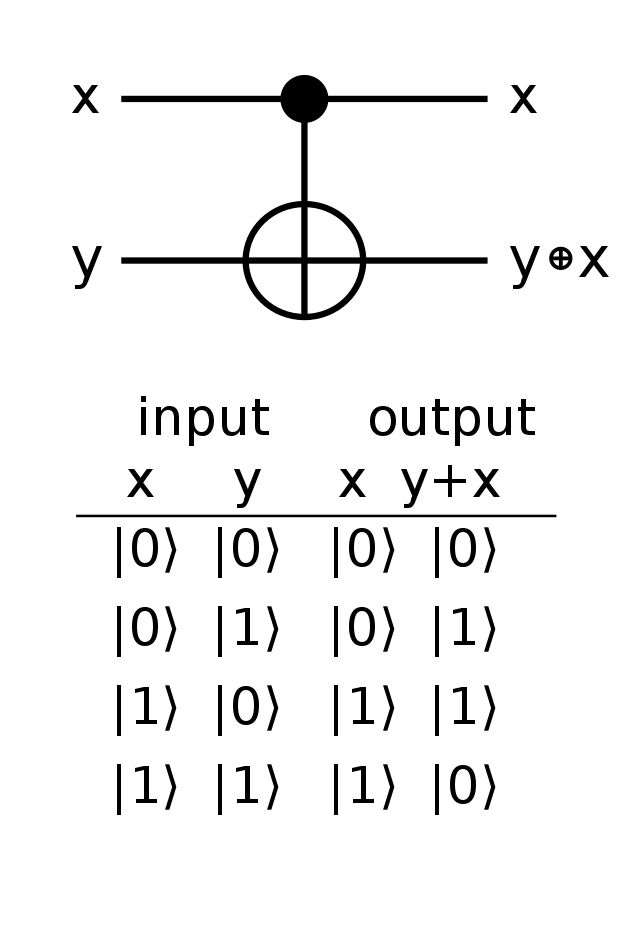

In [52]:
from IPython.display import Image
Image("c:\\Users\\nagen\\Desktop\\CNOT.png")


#### Controlled $Y$ gate

Apply the $Y$ gate to the target qubit if the control qubit is the MSB

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

or when the LSB is the control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

In [53]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw()

q1_0: ──■──
      ┌─┴─┐
q1_1: ┤ Y ├
      └───┘

In [54]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

#### Controlled $Z$ (or, controlled Phase) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $\left|1\right\rangle$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


In [55]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw()

q1_0: ─■─
       │ 
q1_1: ─■─

In [56]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

### Controlled Hadamard gate

Apply $H$ gate to the target qubit if the control qubit is $\left|1\right\rangle$. Below is the case where the control is the LSB qubit.

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

In [57]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw()

q1_0: ──■──
      ┌─┴─┐
q1_1: ┤ H ├
      └───┘

In [58]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.   -0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

### Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

In [59]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
qc.draw()

q1_0: ─────■──────
      ┌────┴─────┐
q1_1: ┤ RZ(pi/2) ├
      └──────────┘

In [60]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

### Controlled phase rotation

Perform a phase rotation if both qubits are in the $\left|11\right\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

In [61]:
qc = QuantumCircuit(q)
qc.cu1(pi/2,q[0], q[1])
qc.draw()

q1_0: ─■─────
       │pi/2 
q1_1: ─■─────

In [62]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

### Controlled $u3$ rotation

Perform controlled-$u3$ rotation on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$. 

$$
C_{u3}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

In [63]:
qc = QuantumCircuit(q)
qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])
qc.draw()

q1_0: ──────────■───────────
      ┌─────────┴──────────┐
q1_1: ┤ U3(pi/2,pi/2,pi/2) ├
      └────────────────────┘

In [64]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [65]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw()

q1_0: ─X─
       │ 
q1_1: ─X─

In [66]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

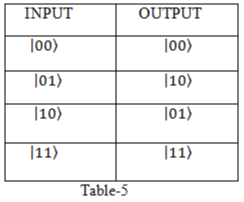

In [67]:
from IPython.display import Image
Image("c:\\Users\\nagen\\Desktop\\Swap.png")

## Three-qubit gates <a name="three_gates"/>


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

In [68]:
q = QuantumRegister(3)

In [69]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

q2_0: ──■──
        │  
q2_1: ──■──
      ┌─┴─┐
q2_2: ┤ X ├
      └───┘

In [70]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

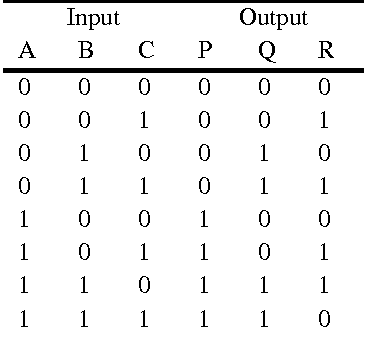

In [71]:
from IPython.display import Image
Image("c:\\Users\\nagen\\Desktop\\Toffoli.png")

### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the *controlled swap gate*, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [72]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw()

q2_0: ─■─
       │ 
q2_1: ─X─
       │ 
q2_2: ─X─

In [73]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])